In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar
import sys
sys.path.append('modules')  
from functions import SOR_Eq_TOL
#from modules.functions import SOR_Eq_TOL 

In [13]:
n_values = [10, 30, 50, 100, 200]
optimal_omega = []
iterations_needed = []

tol = 1e-5  # tolerance

In [ ]:
'''
n = 50
matrix = np.zeros((n, n))
matrix[0] = 1
matrix[-1] = 0

omega_values = np.linspace(0.001, 1.999, 8) 
tol_values = np.logspace(-1, -6, 6)  # tolerance

iterations = np.zeros((8, 6))


for i, omega in enumerate(omega_values):
    print(f"Omega = {omega:.4f}")
    for j, tol in enumerate(tol_values):
        iterations[i, j] = SOR_Eq_TOL(matrix, tol, omega)

np.save("data/omega_values.npy", omega_values)
np.save("data/tol_values.npy", tol_values)
np.save("data/iterations.npy", iterations)

for i in range(8):
    plt.plot(tol_values, iterations[i], label=f"Omega = {omega_values[i]}")
plt.xlabel("Tolerance")
plt.ylabel("Iterations")
plt.yscale("log")
plt.xscale("log")
plt.legend()
plt.title("Iterations needed for different omega values")
plt.show()
'''

In [14]:
for n in n_values:
    matrix = np.zeros((n, n))
    matrix[0] = 1
    matrix[-1] = 0

    def f(omega):
        return SOR_Eq_TOL(matrix, tol, omega)

    # scipy minimize_scalar, should be faster
    result = minimize_scalar(f, bounds=(1, 2), method='bounded')

    best_omega = result.x
    min_iterations = result.fun  # minimum iterations found

    # save
    optimal_omega.append(best_omega)
    iterations_needed.append(min_iterations)

    print(f"n = {n}, Optimal omega = {best_omega:.4f}, Iterations = {min_iterations:.0f}")

n = 10, Optimal omega = 1.6253, Iterations = 30
n = 30, Optimal omega = 1.8658, Iterations = 90
n = 50, Optimal omega = 1.9098, Iterations = 154
n = 100, Optimal omega = 1.9570, Iterations = 272
n = 200, Optimal omega = 1.9782, Iterations = 518


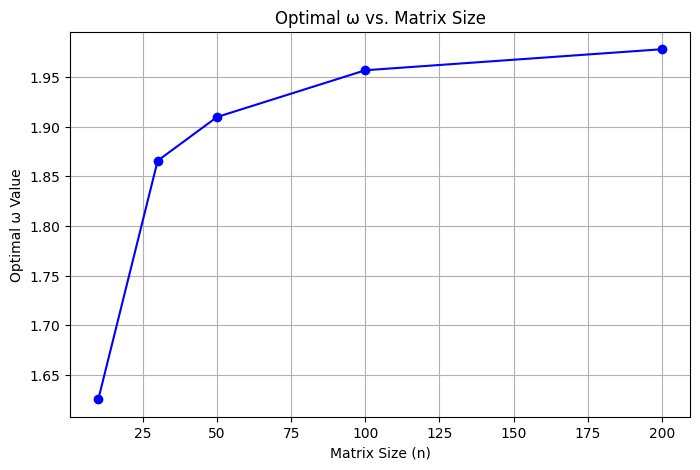

In [16]:
np.save("optimal_omega.npy", optimal_omega)
np.save("iterations_optimal.npy", iterations_needed)
np.save("n_values.npy", n_values)


plt.figure(figsize=(8, 5))
plt.plot(n_values, optimal_omega, marker="o", linestyle="-", color="b")
plt.xlabel("Matrix Size (n)")
plt.ylabel("Optimal ω Value")
plt.title("Optimal ω vs. Matrix Size")
plt.grid()
plt.show()